# <strong>Statistics (Chapter 11)
1. <strong>정규성 검정</strong> : 금융 모델의 <strong>시계열 수익률 모형</strong>에 대한 정규성 검정
1. <strong>포트폴리오이론</strong> : 투자와 관계된 <strong>주관적/경험적 분산 판단을, 수학적/통계적</strong> 방법으로 대체
1. <strong>주성분 분석</strong> : 수많은 시계열 성분중, <strong>소수의 선형/독립적 (또는 상관성 없는) 성분을 구별</strong>해 복잡도를 줄인다
1. <strong>베이즈 회귀</strong> : 확률의 주관적 척도와 이를 <strong>계속적 갱신

<br></br>
## <strong>1 정규성 검정
<strong>주식 수익률의 정규성 가정</strong>은, <strong>통계적 시각적 검정</strong>시 핵심적으로 이루어지는 작업이다
1. <strong>포트폴리오 이론</strong> : <strong>주식수익률은 정규분포를 구성</strong>하므로, 평균수익/ 수익의분산/ 주신사이의 공분산을 고려하여 투자를 결정
1. <strong>효율적 시장 가설</strong> : 모든 정보는 시장참여자에게 공유가 되고, <strong>수익률은 정규분포로 수렴</strong>한다
1. <strong>옵션 가격결정 모형</strong> : <strong>브라운 운동모형</strong>에 따른 정규분포 수익률을 형성한다
1. <strong>자본자산 가격결정 모형</strong> : <strong>수익률이 정규분포를 구성하면, 개별 주식의 가격과 전체 지수의 관계를 Beta 값</strong>으로 측정가능

### <strong>01 히스토그램, 확률밀도함수, <a href ="https://datascienceschool.net/view-notebook/76acc92d28354e86940001f9fe85c50f/">Q-Q Plot 검정</a>
기하 브라운 모델의 <strong>몬테카를로 시뮬레이션 운동경로 Log</strong> 분석
1. <strong>로그 정규분포 값 :</strong> 임의의 시간 t > 0 에서 $S_t$의 값은 <strong>'로그 정규분포'</strong>를 이룬다
1. <strong>로그 정규분포 수익률 :</strong> <strong>시간 s 와 t (0< s< t) 사이</strong>의, <strong>로그 수익률</strong> $log (\frac{S_t}{S_s}) = log S_t - log S_s$은 정규분포를 이룬다

In [1]:
# 기하 브라운 운동모형에 대한 '몬테카를로 경로'를 생성
# < Parameter >
# S0    : 초기 가격 (float)
# r     : 고정 단기 이자율 (float)
# sigma : 고정 변동성 (float)
# T     : 만기 기간(Year) (float)
# M     : 만기 기간을 분석을 위해 분할 한 구간 수 (int)
# I     : 생성한 경로의 수 (int)
# < Returns >
# paths : 주어진 인수값 (ndarray, shape (M + 1, I))

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('font', family='NanumGothic')
import matplotlib.pyplot as plt

import numpy as np
np.random.seed(1000)
import scipy.stats as scs
import statsmodels.api as sm

/home/markbaum/Python/django/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(51, 250000)


array([ 100.    ,   97.821 ,   98.5573,  106.1546,  105.899 ,   99.8363,
        100.0145,  102.6589,  105.6643,  107.1107,  108.7943,  108.2449,
        106.4105,  101.0575,  102.0197,  102.6052,  109.6419,  109.5725,
        112.9766,  113.0225,  112.5476,  114.5585,  109.942 ,  112.6271,
        112.7502,  116.3453,  115.0443,  113.9586,  115.8831,  117.3705,
        117.9185,  110.5539,  109.9687,  104.9957,  108.0679,  105.7822,
        105.1585,  104.3304,  108.4387,  105.5963,  108.866 ,  108.3284,
        107.0077,  106.0034,  104.3964,  101.0637,   98.3776,   97.135 ,
         95.4254,   96.4271,   96.3386])

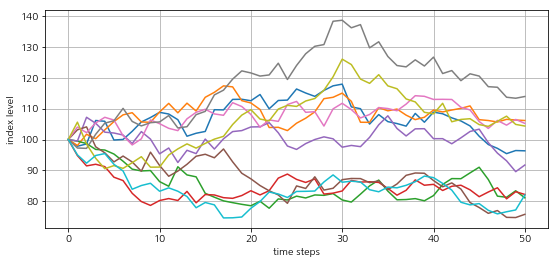

In [2]:
# 브라운 운동 모형에 의한 '몬테카를로 경로'를 생성
def gen_paths(S0, r, sigma, T, M, I): 
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                  sigma * np.sqrt(dt) * rand)
    return paths  # ndarray롤 출력

S0, r,  sigma = 100., 0.05, 0.2
T,  M,  I     = 1.0 ,   50, 250000       # 1.0 년의 시간 구간을  1) 50구간으로 분할  2) 250,000회 시뮬레이션 
paths = gen_paths(S0, r, sigma, T, M, I); print(paths.shape)

plt.figure(figsize=(9,4))
plt.plot(paths[:, ::25000])  # 50개 구간을 분석한 25만 개 전체 중 10개(2만5천번의 간격) 기하 브라운 운동 시뮬레이션 경로를 시각화
plt.grid(True); plt.xlabel('time steps'); plt.ylabel('index level')
paths[:, 0].round(4)                         # 브라운 운동모형 시뮬레이션

In [3]:
def print_statistics(array):    # 통계적 분석결과를 테이블로 출력
    sta = scs.describe(array)   # scs.describe() 결과를 보기좋게 재정렬
    print("%14s %15s" % ('statistic', 'value'),'\n', 30 * "-")
    print("%14s %15.5f" % ('크기(size)', sta[0]))
    print("%14s %15.5f" % ('최소(min)', sta[1][0]))
    print("%14s %15.5f" % ('최대(max)', sta[1][1]))
    print("%14s %15.5f" % ('평균(mean)', sta[2]))
    print("%14s %15.5f" % ('표준편차(std)', np.sqrt(sta[3])))
    print("%14s %15.5f" % ('왜도(skew)', sta[4]))
    print("%14s %15.5f" % ('첨도(kurtosis)', sta[5]))

# log변환 후, .flatten()로 1차원 ndarray로 변환
log_returns = np.log(paths[1:] / paths[0:-1])   # 로그 수익률 Log 분포로 변환
print('log_returns.shape : {} \nby .flatten() : {}\n'.format(log_returns.shape, log_returns.flatten().shape))
print(print_statistics(log_returns.flatten())) 
# 결과 : 12만개 데이터가 모두 +-0.15 사이에 분포함을 알 수 있다
# 이를 평균수익률과 표준편차를 연율화 하면 0.05, 0.2를 예측할 수 있다

log_returns.shape : (50, 250000) 
by .flatten() : (12500000,)

     statistic           value 
 ------------------------------
      크기(size)  12500000.00000
       최소(min)        -0.15664
       최대(max)         0.15371
      평균(mean)         0.00060
     표준편차(std)         0.02828
      왜도(skew)         0.00055
  첨도(kurtosis)         0.00085
None


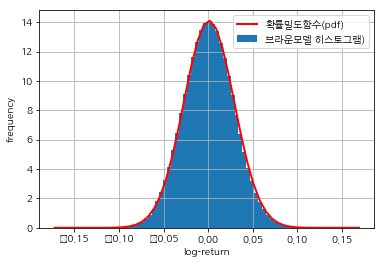

In [4]:
# <정규성 측정 1>
# 1. 브라운모델 히스토그램 : 12,500,000 개의 자료가 +/- 0.15 사이에 분포
plt.hist(log_returns.flatten(), bins=70, normed=True, label='브라운모델 히스토그램)')  # 로그 수익률의 히스토그램과 정규분포 밀도함수 시각화
plt.grid(True); plt.xlabel('log-return'); plt.ylabel('frequency')
# 2. 확률밀도함수 : scs.norm.pdf() (1.의 결과와일치)
# 출처 (https://datascienceschool.net/view-notebook/4d74d1b5651245a7903583f30ae44608/)
# 연속확률분포 : 구간별 분포 확률을 계산 
# 누적확률분포 : 초기값을 고정 후 뒷 구간을 변화화며 분포값을 계산
# 확률밀도함수 : 구간을 미분으로 나누어, 구간별 확률을 계산
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r/M, scale=sigma/np.sqrt(M)),'r' , lw=2.0, label='확률밀도함수(pdf)'); plt.legend()
# 결과 : 이론적인 확률밀도와 히스토그램을 비교하여 정규성을 증명한다

Text(0,0.5,'sample quantiles')

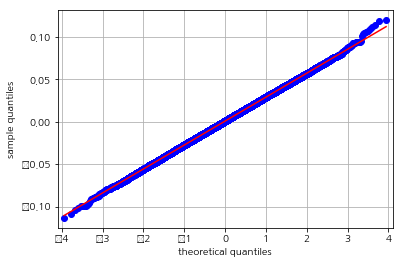

In [5]:
# <정규성 측정 2>
# 3. Q-Q plot : 샘플값의 샘플 분위수와, 정규분포상의 이론적 분위수를 비교한다
# 확률분포를 동일한 확률로 쪼갠 그래프 
# 정규분포를 갖는 경우 직선을 그린다 ()
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

### <strong>02 통계적 검정
(<strong>Log 데이터</strong>를 활용한) 통계적 검정  : 시각적 검정 절차를 체계적으로 수행

In [6]:
# 왜도 검정 skew-test : 샘플자료의 왜도가 정규분포와 일치를 검정한다
# 첨도 검정 kurto-test : 샘플자료의 첨도가 정규분포와 일치를 검정한다
# 정규성 검정 normal-test : 두 검정방법을 조합한다
def normality_tests(arr):
    print("Skew of data set  %14.3f" % scs.skew(arr))
    print("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    print("Kurt of data set  %14.3f" % scs.kurtosis(arr))
    print("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print("Norm test p-value %14.3f" % scs.normaltest(arr)[1])
    
normality_tests(log_returns.flatten())
# 검정결과
# p-value(유의 확률) 0.05 이상이므로, Log 수익률이 정규분포임을 알 수 있다

Skew of data set           0.001
Skew test p-value          0.430
Kurt of data set           0.001
Kurt test p-value          0.541
Norm test p-value          0.607


Text(0.5,1,'log data')

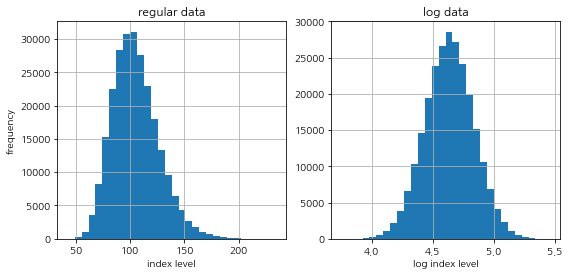

In [7]:
# 시뮬레이션 만기의 값 히스토그램
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax1.hist(paths[-1], bins=30)
ax1.grid(True); ax1.set_xlabel('index level'); ax1.set_ylabel('frequency'); ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]), bins=30)
ax2.grid(True); ax2.set_xlabel('log index level'); ax2.set_title('log data')
# 결과 : 로그변환한 데이터가 정규성을 더 강하게 갖는다

In [8]:
print('브라운 모델 통계적 검정 :'); print_statistics(paths[-1])
print('\nLog 변환 후 통계적 검정 :'); print_statistics(np.log(paths[-1]))
# 로그 변환 검정결과, 외도/ 첨도 모두 0으로 수렴 : 정규성이 더 강하다
# 높은 유의 확률값을 통해 정규분포 가설의 검증이 가능하다

브라운 모델 통계적 검정 :
     statistic           value 
 ------------------------------
      크기(size)    250000.00000
       최소(min)        42.74870
       최대(max)       233.58435
      평균(mean)       105.12645
     표준편차(std)        21.23174
      왜도(skew)         0.61116
  첨도(kurtosis)         0.65182

Log 변환 후 통계적 검정 :
     statistic           value 
 ------------------------------
      크기(size)    250000.00000
       최소(min)         3.75534
       최대(max)         5.45354
      평균(mean)         4.63517
     표준편차(std)         0.19998
      왜도(skew)        -0.00092
  첨도(kurtosis)        -0.00327


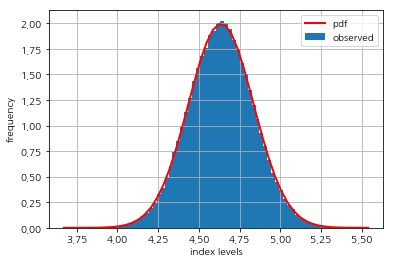

In [9]:
# 로그 변환값의 히스토그램과 정규분호 확률밀도함수를 비교
log_data = np.log(paths[-1])
plt.hist(log_data, bins=70, normed=True, label='observed')    # 히스토그램
plt.grid(True); plt.xlabel('index levels'); plt.ylabel('frequency')

x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()),
         'r', lw=2.0, label='pdf'); plt.legend()              # 확률밀도함수

Text(0,0.5,'sample quantiles')

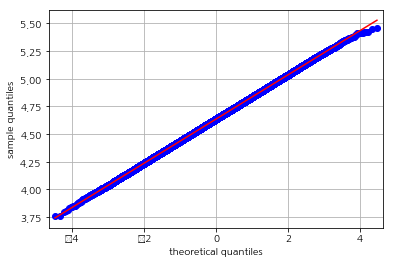

In [10]:
# Quantile-quantile plot for log index levels
sm.qqplot(log_data, line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
# (Question) 1번의 내용과 동일한 분석인데
# 왜 끝의 구부러진 방향은 반대인가?? (방향성은 덜 중요한 문제여서 무시해도 되는가???)

### <strong>03 주식자료 분석
시계열 데이터 분석

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-11-18 to 2018-01-08
Data columns (total 4 columns):
^GDAXI    1762 non-null float64
GM        1762 non-null float64
INTC      1762 non-null float64
MSFT      1762 non-null float64
dtypes: float64(4)
memory usage: 68.8 KB

                  ^GDAXI         GM       INTC       MSFT
Date                                                    
2010-11-18  6832.109863  34.189999  21.020000  25.840000
2010-11-19  6843.549805  34.259998  21.139999  25.690001 None


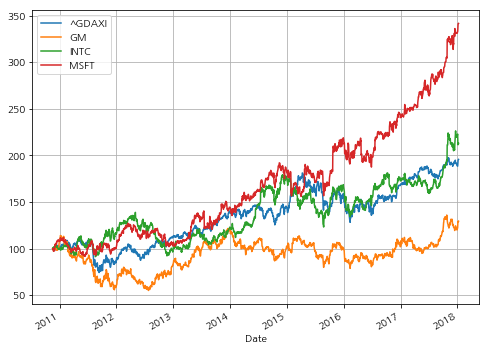

In [11]:
# 주가 데이터 불러오기
import pandas as pd
from pandas_datareader import get_data_yahoo

symbols = ['^GDAXI', 'GM','INTC', 'MSFT']
# data = pd.DataFrame()
# for sym in symbols:
#     try: data[sym] = get_data_yahoo(sym, '2010-01-01')['Close']
#     except: pass
# data = data.dropna()
data = pd.read_csv('./data/stocks.csv')
data = data.set_index('Date')           # index 로 활용할 컬럼을 지정
data.index = pd.to_datetime(data.index) # index 를 Datetime 포맷으로 변환
print('\n', data.head(2), data.info())

# 시간에 따른 수식과 지수의 변화
(data / data.iloc[0] * 100).plot(figsize=(8, 6), grid=True)

              ^GDAXI        GM      INTC      MSFT
Date                                              
2010-11-18       NaN       NaN       NaN       NaN
2010-11-19  0.001673  0.002045  0.005693 -0.005822


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d4a4d69e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5d143e69e8>]], dtype=object)

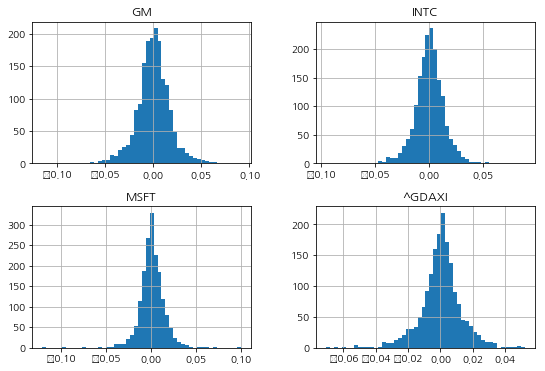

In [12]:
# Log 수익률 분석
# 수익률은 Numpy 보다, Pandas의 .shift(1)(데이터 index를 1개씩 미룸)가 더 편리하다
log_returns = np.log(data / data.shift(1))  
print(log_returns.head(2))

# 개별 종목들의 Log 수익률 분포를 히스토그램으로 변환
log_returns.hist(bins=50, figsize=(9, 6))

In [13]:
# 개별 종목에 대한 시계열 데이터의 통계치를 연산
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(30 * "-")
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol ^GDAXI
------------------------------
     statistic           value 
 ------------------------------
      크기(size)      1761.00000
       최소(min)        -0.07067
       최대(max)         0.05210
      평균(mean)         0.00038
     표준편차(std)         0.01273
      왜도(skew)        -0.34051
  첨도(kurtosis)         2.84947

Results for symbol GM
------------------------------
     statistic           value 
 ------------------------------
      크기(size)      1761.00000
       최소(min)        -0.11544
       최대(max)         0.09108
      평균(mean)         0.00015
     표준편차(std)         0.01791
      왜도(skew)        -0.11702
  첨도(kurtosis)         3.33063

Results for symbol INTC
------------------------------
     statistic           value 
 ------------------------------
      크기(size)      1761.00000
       최소(min)        -0.09543
       최대(max)         0.08867
      평균(mean)         0.00043
     표준편차(std)         0.01424
      왜도(skew)         0.02844
  첨도(kurtosis)      

Text(0,0.5,'sample quantiles')

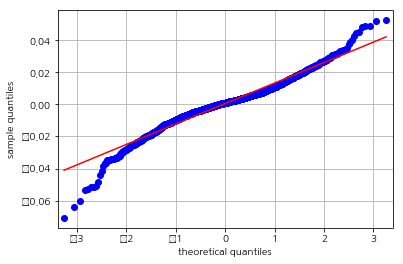

In [14]:
# DAX 지수 로그 수익률을 Q-Q plot 으로 시각화
sm.qqplot(log_returns['^GDAXI'].dropna(), line='s')
plt.grid(True); plt.xlabel('theoretical quantiles'); plt.ylabel('sample quantiles')
# 양쪽의 이상치 outlier 들이 정규분포보다 양수/ 음수인 경우를 반영한 결과이다
# 시계열 데이터의 경우 Fat tail 현상을 나타난다

Text(0,0.5,'sample quantiles')

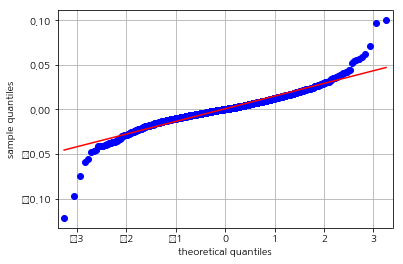

In [15]:
# Quantile-quantile plot for Microsoft log returns
# MSFT 주식의 로그 수익률 Q-Q plot
sm.qqplot(log_returns['MSFT'].dropna(), line='s')
plt.grid(True); plt.xlabel('theoretical quantiles'); plt.ylabel('sample quantiles')

In [16]:
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(32 * "-")
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)
# <종목별 통계적 해석결과>
# 유의확률이 모두 0으로써, 정규분포 가정을 강력하게 기각한다
# 따라서 주가분석은 '정규분포'모델은 기각될 수 밖에 없고, Fat tail을 적용가능한 확장 모형을 필요로 한다


Results for symbol ^GDAXI
--------------------------------
Skew of data set          -0.341
Skew test p-value          0.000
Kurt of data set           2.849
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol GM
--------------------------------
Skew of data set          -0.117
Skew test p-value          0.045
Kurt of data set           3.331
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol INTC
--------------------------------
Skew of data set           0.028
Skew test p-value          0.625
Kurt of data set           4.121
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol MSFT
--------------------------------
Skew of data set          -0.126
Skew test p-value          0.030
Kurt of data set           8.428
Kurt test p-value          0.000
Norm test p-value          0.000


<br></br>
## <strong>2 포트폴리오 최적화
Portfolio Optimization

1. 기말 자산가치의 분포의 설명을 위해서는, <strong>평균, 분산</strong> 이외의 어떠한 통계치도 필요없다
1. 만약 투자자가 <strong>'이차원 아닌 특별한 형태의 효용성 함수(utility function)'</strong>를 정의하지 <strong>않고 있다면</strong> 
1. <strong>수익률은 평균과 분산만으로 완벽하게 설명이 가능하다

### <strong>01 자료분석
일간 수익률 분석 및 공분산 시각화

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2038 entries, 2010-01-04 to 2018-01-08
Data columns (total 6 columns):
^GDAXI    2034 non-null float64
^IXIC     1986 non-null float64
AAPL      1986 non-null float64
MSFT      1986 non-null float64
DB        1986 non-null float64
GLD       1986 non-null float64
dtypes: float64(6)
memory usage: 111.5 KB


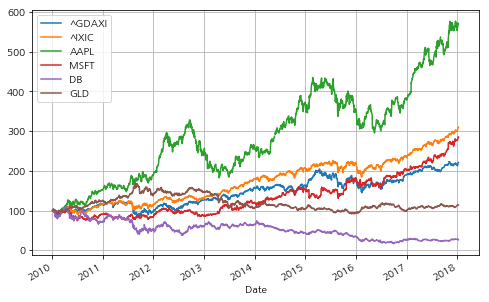

In [17]:
%matplotlib inline
# 주가 데이터 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import get_data_google
symbols = ['^GDAXI','^IXIC', 'AAPL', 'MSFT', 'DB', 'GLD']  # ^IXIC : 나스닥 지수
# data = pd.DataFrame()
# for sym in symbols:
#     try:      data[sym] = get_data_yahoo(sym, '2010-01-01')['Close']
#     except:
#         try:  data[sym] = get_data_yahoo(sym, '2010-01-01')['Close']
#         except: pass
# data.columns = symbols
data = pd.read_csv('./data/stocks2.csv')
data = data.set_index('Date')            # 전체 DataFrame의 index를 정의
data.index = pd.to_datetime(data.index)  # index의 포맷을 정의

# 시간에 따른 주가의 변화
(data / data.iloc[0] * 100).plot(figsize=(8, 5), grid=True)
data.info()

log (주간)수익률 평균  :
^GDAXI    0.097801
^IXIC     0.128059
AAPL      0.185435
MSFT      0.117459
DB       -0.156661
GLD       0.013763
dtype: float64

투자자산에 대한 공분산  :
          ^GDAXI     ^IXIC      AAPL      MSFT        DB       GLD
^GDAXI  0.039057  0.020870  0.017081  0.019163  0.051954 -0.001508
^IXIC   0.020870  0.028391  0.027671  0.026010  0.044367  0.000070
AAPL    0.017081  0.027671  0.065386  0.022605  0.034161  0.001624
MSFT    0.019163  0.026010  0.022605  0.050574  0.038438 -0.000410
DB      0.051954  0.044367  0.034161  0.038438  0.168521 -0.000292
GLD    -0.001508  0.000070  0.001624 -0.000410 -0.000292  0.027160


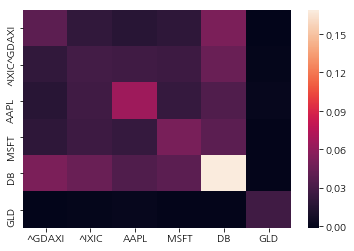

In [18]:
# 252일을 총 거래일로 가정하여, 일간 수익률 분석
rets = np.log(data / data.shift(1))
print('log (주간)수익률 평균  :\n{}\n\n투자자산에 대한 공분산  :\n{}'.format(
       rets.mean() * 252,   rets.cov() * 252))

import seaborn as sns
sns.heatmap(rets.cov() * 252); plt.show()

### <strong>02 기초이론
1. $ \mu_p $ (포트폴리오 <strong>전체 기대수익률</strong>) : $ \mu_p = E(\Sigma_i w_i r_i) = w^T \mu$
1. $ \sigma_p^2$ (포트폴리오 <strong>분산의 기댓값</strong>) : $ \sigma_p^2 = E((r-\mu)^2) $
1. $ \sqrt{\sigma_p^2} $ : 포트폴리오의 <strong>표준편차(변동성)</strong>
1. $ SR = \frac{\mu_p - r_f}{\sigma_p} $<strong>샤프지수(Sharp Ratio)</strong> : 포트폴리오 <strong>초과 수익 기댓값</strong> / 포트폴리오 <strong>표준편차 기댓값</strong>

In [19]:
# 기초이론 (The Basic Theory)
weights = np.random.random(len(data.columns))
weights /= np.sum(weights)   # 포트폴리오 종목별 비중값 : 총합이 1인, 6개의 난수를 생성
print('종목별 비중\t: {}\n기대수익률 \t: {:.5f}\n기댓값(분산)\t: {:.5f}\n표준편차(변동성)    : {:.5f}'.format(
      weights, 
      np.sum(rets.mean() * weights) * 252,
      np.dot(weights.T, np.dot(rets.cov() * 252, weights)),
      np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))))

종목별 비중	: [ 0.02877822  0.02265145  0.23834451  0.08637583  0.45464201  0.16920798]
기대수익률 	: -0.00884
기댓값(분산)	: 0.05419
표준편차(변동성)    : 0.23279


Text(0,0.5,'기대 수익률(expected return)')

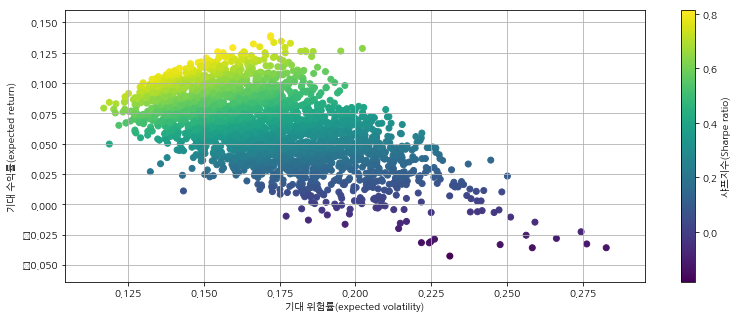

In [20]:
prets = []       # prets : 무위험 이자율에 대한 '포트폴리오 초과수익' 기댓값
pvols = []       # pvols : '포트폴리오 표준편차' 기댓값
for p in range (2500):
    weights = np.random.random(len(data.columns))
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)  # 표준편차 (포트폴리오 수익) 계산
    pvols.append(np.sqrt(np.dot(weights.T, 
                 np.dot(rets.cov() * 252, weights))))  # 몬테카를로 시뮬레이션 (수익의 변동성)
prets, pvols = np.array(prets), np.array(pvols)

plt.figure(figsize=(13, 5))
# 샤프지수를 시각화 : (무위험 단기 이자율에 대한 포트폴리오의 초과 수익률 기댓값) / 포트폴리오 표준편차 기댓값
# 투자자는 위험은 낮으면서 수익은 높은 상품을 찾고, 이를 '04. 효율적 투자선(efficient frontier)'라 부른다
plt.scatter(pvols, prets, c=prets/pvols, marker='o'); plt.colorbar(label='샤프지수(Sharpe ratio)')  
plt.grid(True); plt.xlabel('기대 위험률(expected volatility)'); plt.ylabel('기대 수익률(expected return)')

### <strong>03 포트폴리오 최적화
Portfolio Optimizations
1. Log데이터 <strong>샤프지수 최대화</strong> 최적 분산비율
1. Log데이터 <strong>분산비율 초소화</strong> 최적 분산비율

In [21]:
# 제약조건
cons = ({'type':'eq',  'fun':lambda x: np.sum(x)-1})   # 제약조건 : 모든 비중의 합이 1이다
bnds = tuple((0,1) for x in range(len(data.columns)))  # 0~1 사이값으로, tuple 형태로 minimize 함수에 입력
len(data.columns) * [1. / len(data.columns), ]         # 초기값 리스트를 총합 1로 '균등배분'한다

# 포트폴리오의 통계 분석 출력
def statistics(weights):
    weights = np.array(weights)                 # weights : 포트폴리오 내 증권의 비율 (array)
    pret = np.sum(rets.mean() * weights) * 252  # pret    : 포트폴리오 기대값, 수익률 (float)
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights))) # pvol : 기댓값 변동성 (float)
    return np.array([pret, pvol, pret / pvol])  # pret / pvol : 무위험 이자율 0일떄 샤프지수

In [22]:
# 조건1) 샤프지수를 최대화 (음수값을 최소로 한다)
def min_func_sharpe(weights):
    return -statistics(weights)[2]

import scipy.optimize as sco                        # sco.minimize() : 제약조건내 최적화 포트폴리오
opts = sco.minimize(min_func_sharpe,                                # return 최종 결과함수 
                    len(data.columns) * [1. / len(data.columns),],  # 균등배분
                    method = 'SLSQP',                               # 최적화 방식
                    bounds = bnds,                                  # input 데이터
                    constraints = cons)                             # 제약조건
print(opts)
print("""\n샤프지수 최대화 포트폴리오 분산 비율 : \n{}
      \n<<최적 포트폴리오 비중>>\n수익률 기댓값 : {}\n변동성 기댓값 : {}\n최적 샤프지수 : {}""".format(
    opts['x'].round(3),                 # 분산비율 (PortFolio 비중을 조절 결과값 : 'x' array([]) => (1, 6번의 비중을 높인다))
    statistics(opts['x']).round(3)[0],  # 수익률 기댓값
    statistics(opts['x']).round(3)[1],  # 변동성 기댓값
    statistics(opts['x']).round(3)[2])) # 최적 샤프지수

     fun: -0.826044775266522
     jac: array([ -1.13606453e-04,   5.51268458e-05,  -2.14986503e-04,
         2.54683197e-04,   2.15918323e+00,   4.82648611e-04])
 message: 'Optimization terminated successfully.'
    nfev: 72
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([ 0.07885153,  0.48683808,  0.31469019,  0.03494594,  0.        ,
        0.08467426])

샤프지수 최대화 포트폴리오 분산 비율 : 
[ 0.079  0.487  0.315  0.035  0.     0.085]
      
<<최적 포트폴리오 비중>>
수익률 기댓값 : 0.134
변동성 기댓값 : 0.162
최적 샤프지수 : 0.826


In [23]:
# 조건2) 포트폴리오 분산최소화 함수를
def min_func_variance(weights):
    return statistics(weights)[1] ** 2

optv = sco.minimize(min_func_variance,   # 분산 최소 포트폴리오를 계산한다 
                    len(data.columns) * [1. / len(data.columns),],
                    method='SLSQP',
                    bounds=bnds, 
                    constraints=cons)
print(optv)
print("""\n분산을 최소로 하는 포트폴리오 분산 비율 : \n{}
      \n<<최적 포트폴리오 비중>>\n수익률 기댓값 : {}\n변동성 기댓값 : {}\n최적 샤프지수 : {}""".format(
    optv['x'].round(3),                 # 분산비율
    statistics(optv['x']).round(3)[0],  # 수익률 기댓값
    statistics(optv['x']).round(3)[1],  # 변동성 기댓값
    statistics(optv['x']).round(3)[2])) # 최적 샤프지수

     fun: 0.013052042752826135
     jac: array([ 0.02625652,  0.02593879,  0.02662024,  0.02557264,  0.04684431,
        0.02616493])
 message: 'Optimization terminated successfully.'
    nfev: 104
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([  1.86048718e-01,   2.62560561e-01,   1.64702274e-02,
         4.39149903e-02,   4.33680869e-19,   4.91005503e-01])

분산을 최소로 하는 포트폴리오 분산 비율 : 
[ 0.186  0.263  0.016  0.044  0.     0.491]
      
<<최적 포트폴리오 비중>>
수익률 기댓값 : 0.067
변동성 기댓값 : 0.114
최적 샤프지수 : 0.585


### <strong>04 효율적 투자선
<strong>고정된 최적화 초기조건</strong>을 반복하며 1)<strong>고정된 목표 수익률</strong>로 계산한 뒤, 2)<strong>종목의 비중을 조절</strong>하며 최적의 조건을 찾는다
1. 최적화 제약조건
    1. 목표수익률 : trets = np.linespace() 목표 수익률의 수준
    1. 포트폴리오 비중의 합은 1

Text(0,0.5,'expected return')

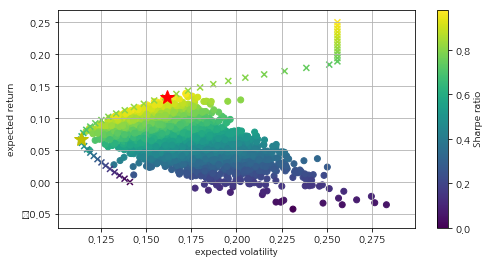

In [24]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

def min_func_port(weights):
    return statistics(weights)[1]  # 변동성 결과값만 기록한다

trets = np.linspace(0.0, 0.25, 50)  # 0. ~ 0.25 사이의 값들로 '기대수익'50개 생성
tvols = []                          # 포트폴리오의 표준편차 기록변수
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, 
                       len(data.columns) * [1./len(data.columns),], 
                       method='SLSQP', bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)  # ndarray 객체로 변환

plt.figure(figsize=(8, 4))                                      # 주어진 수익률 수준에 대한 최소위험 포트폴리오
plt.scatter(pvols, prets, c = prets / pvols, marker='o')                             # 무작위 포트폴리오
plt.scatter(tvols, trets, c = trets / tvols, marker='x')                             # 효율적 투자선
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0], 'r*', markersize=15.0)  # 최대 샤프지수의 포트폴리오
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0], 'y*', markersize=15.0)  # 최소 분산 포트폴리오
plt.grid(True); plt.colorbar(label='Sharpe ratio'); plt.xlabel('expected volatility'); plt.ylabel('expected return')
# 결과해석
# X points : 효율적 투자선 (최소분산 포트폴리오 보다 수익이 높은 점들)
# 빨간 star : '최대샤프지수'를 갖는 포트폴리오

### <strong>05 자본시장선
금, 달러등 '현금/ 현금성 계정'은 위험이 없는 투자기회로 존재한다

이들의 단점은 수익률이 적거나, 0에 가깝다는 점이다

#### 1) Inter-polation
보간법이란, 거칠은 직선 데이터를, 부드러운 곡선으로 변환

In [ ]:
# 효율적 투자선의 1차 더함수를 필요로 한다
# 각진 직선의 내용을 smooth하게 변경한다

# 좌표값이 최초 제공
import numpy as np
x_org = np.linspace(0, 10, num=10, endpoint=True)
y_org = np.cos(-x_org **2 / 9.0)
plt.figure(figsize=(2,2)); plt.plot(x_org, y_org)

In [ ]:
# 보간법으로 smooth하게 변경한 좌표값
from scipy.interpolate import interp1d
f2 = interp1d(x_org, y_org, kind='cubic')
print('f2 is :',f2)

# num = 61 (총 61개의 점으로 곡선에 반영)
xnew = np.linspace(0, 10, num=61, endpoint=True)
plt.figure(figsize=(2,2))
plt.plot( xnew, f2(xnew), '--')

#### 2) 최적의 Portfolio 찾기
무위험 자산의 위험-수익룰을 지나면서, 효율적 투자선에 접선하는 포트폴리오

위험-수익률 공간에서, (0,무위험 이자율) 을 지나면서 효율적 투자선의 접선에 포함된 포트폴리오를 찾는다

In [ ]:
# 위 자료들 중 '효율적 투자선'은 X 포트폴리오만 추출
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

# evols 의 맨 뒤의 같은 숫자가 연속해서 출현하는걸 삭제해야 진행가능
# https://stackoverflow.com/questions/2009379/interpolate-question
plt.figure(figsize=(2,2))
plt.plot(evols, erets)

In [ ]:
# 큐빅 스플라인 보간법 (두 그래프에 이웃하는 관측점들을 계산한 보간함수를 활용)
import scipy.interpolate as sci
tck = sci.splrep(evols[:-3], erets[:-3])
plt.plot(tck[0], tck[1])

In [ ]:
def f(x):  # 효율적 투사선 함수 (spline의 근사값 계산하기)
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)

def df(x): # 효율적 투자선의 1차 도함수
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

In [ ]:
# 자본시장에 대한 수학적 조건
# 무위험-수익률 공간에서
# 무위험 자산을 지나면서 효율적 투자선에 접하는 직선

def equations(p, rf = 0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

In [ ]:
# sco.fsolve() : 연립방정식을 풀이한다
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])
opt

In [ ]:
# 위 연립방정식 풀이해를 재입한 결과 : 0으로 수렴한다
np.round(equations(opt),6)

In [ ]:
# 무위험 이자율이 1%일떄, 자본시장선과 이에 접하는 포트폴리오

plt.figure(figsize=(8, 4))
# 무작위 포트폴리오
plt.scatter(pvols, prets, c = (prets - 0.01) / pvols, marker='o')
# 효율적 투자선
plt.plot(evols, erets, 'g', lw=4.0)

# 자본시장선
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.5)
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility'); plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [ ]:
# 최적의 포트폴리오 비중으 수치로 출력
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
res = sco.minimize(min_func_port, len(data.columns) * [1. / len(data.columns),], method='SLSQP',
                       bounds=bnds, constraints=cons)
res['x'].round(3)